In [1]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Datasets

            EPV            AI        HI      CAV5       PGA       PGV  \
0      0.002384  6.946829e-02  0.148590  0.102882  0.143261  0.058932   
1      0.000252  2.113795e-03  0.007071  0.007531  0.040735  0.007861   
2      0.002965  2.064091e-02  0.116903  0.177557  0.039074  0.037418   
3      0.000561  3.235864e-03  0.021996  0.030129  0.018565  0.007504   
4      0.006161  1.013760e-01  0.186438  0.210369  0.150071  0.065115   
...         ...           ...       ...       ...       ...       ...   
13850  0.000004  6.376627e-07  0.000140  0.000519  0.000188  0.000086   
13851  0.000005  2.836033e-07  0.000246  0.001117  0.000089  0.000055   
13852  0.000012  2.678898e-06  0.000621  0.002767  0.000389  0.000184   
13853  0.000008  1.954093e-06  0.000297  0.000637  0.000460  0.000148   
13854  0.000038  1.370644e-05  0.001476  0.004890  0.000774  0.000371   

            PGD      SA_0      SA_1      SA_2  ...      SV_1      SV_2  \
0      0.013573  0.143261  0.028641  0.016870  ..

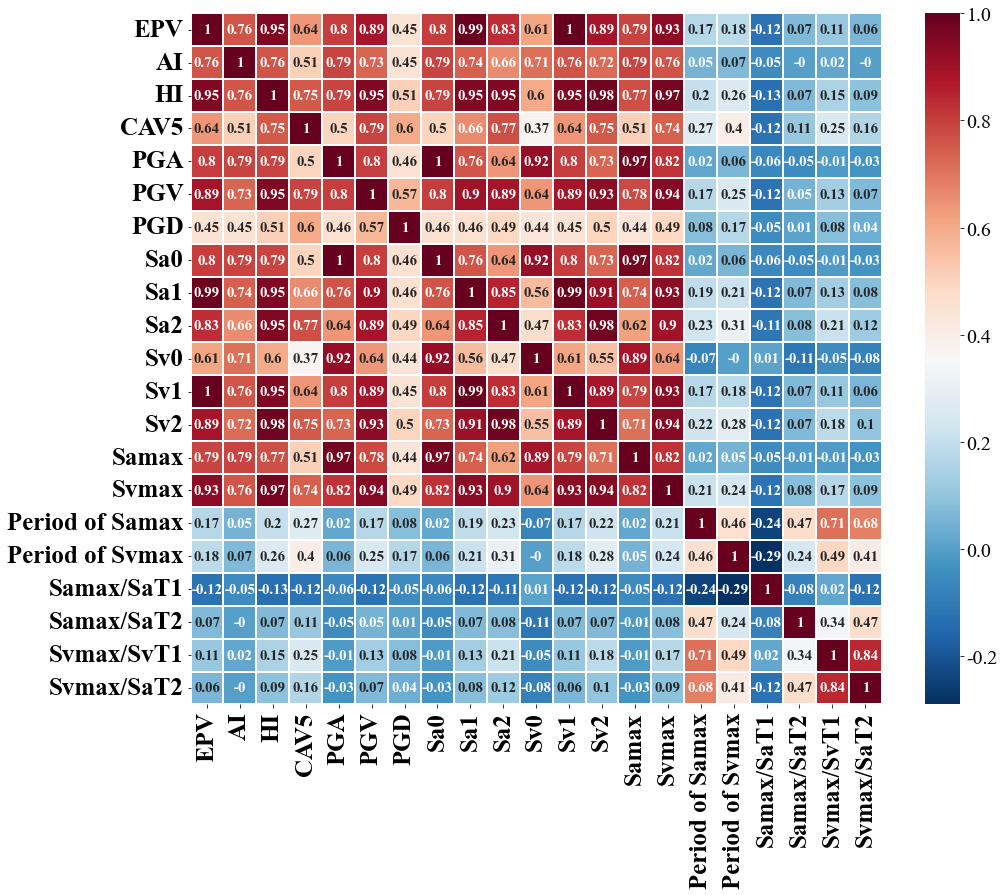

In [2]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
#建立Features
datasets=pd.read_csv("E:\\PyCharm\\PythonProject\\Transformer_response predict\\Machine Learning Dataset.csv")
datasets=pd.DataFrame(datasets)
feature=datasets.iloc[:,1:34]
feature=feature.iloc[:,:21]
target=datasets.iloc[:,34]
feature_names=feature.keys()
print(feature)
print(target)
print(feature_names[:21])
feature_names=['EPV','AI','HI','CAV5','PGA','PGV','PGD','Sa0','Sa1','Sa2','Sv0','Sv1','Sv2','Samax','Svmax',
               'Period of Samax','Period of Svmax',
               'Samax/SaT1','Samax/SaT2','Svmax/SvT1','Svmax/SaT2']
#特征归一化
# scaler=MinMaxScaler(feature_range=(0,1))
# feature=scaler.fit_transform(feature)

# scaler = StandardScaler()
# feature=scaler.fit_transform(feature)


#样本划分
X_train,X_test,y_train,y_test=train_test_split(feature,target,random_state=5,test_size=0.2)


corr=feature.corr()
corr=corr.to_numpy()
corr=np.around(corr,2)
from jupyterthemes import jtplot
# jtplot.style(theme='grade3') #选择一个绘图主题
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,12))
fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
font_Times_New_Roman={"family":"Times New Roman",
                    # "style": "italic",
                    "weight":"heavy",
                    "size":20}
font_Song={"family":"SimSun",
        "style":"italic",
        "weight":"heavy",
        "size":20}
#坐标轴字体
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
import seaborn as sns
h = sns.heatmap(corr,cmap='RdBu_r', linewidths=.05, annot = True,annot_kws={'size':15,'weight':'bold'})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
# h.set_title("Correlation matrix")
plt.xticks(fontproperties='Times New Roman', size=25,weight='bold')
plt.yticks(fontproperties='Times New Roman', size=25,weight='bold')
ax.set_xticklabels(feature_names,rotation=90)
ax.set_yticklabels(feature_names,rotation=0)
plt.savefig("E:\\PyCharm\\PythonProject\\Transformer_response predict\\相关性系数矩阵.png",dpi=300,bbox_inches='tight')

# XGBOOST

In [3]:
model=xgb.XGBRegressor(max_depth=3,n_estimators=1000,learning_rate=0.1)
model.fit(X_train,y_train)
Test_predicted=model.predict(X_test)
y_test=np.array([y_test])
Test_predicted=np.array([Test_predicted])

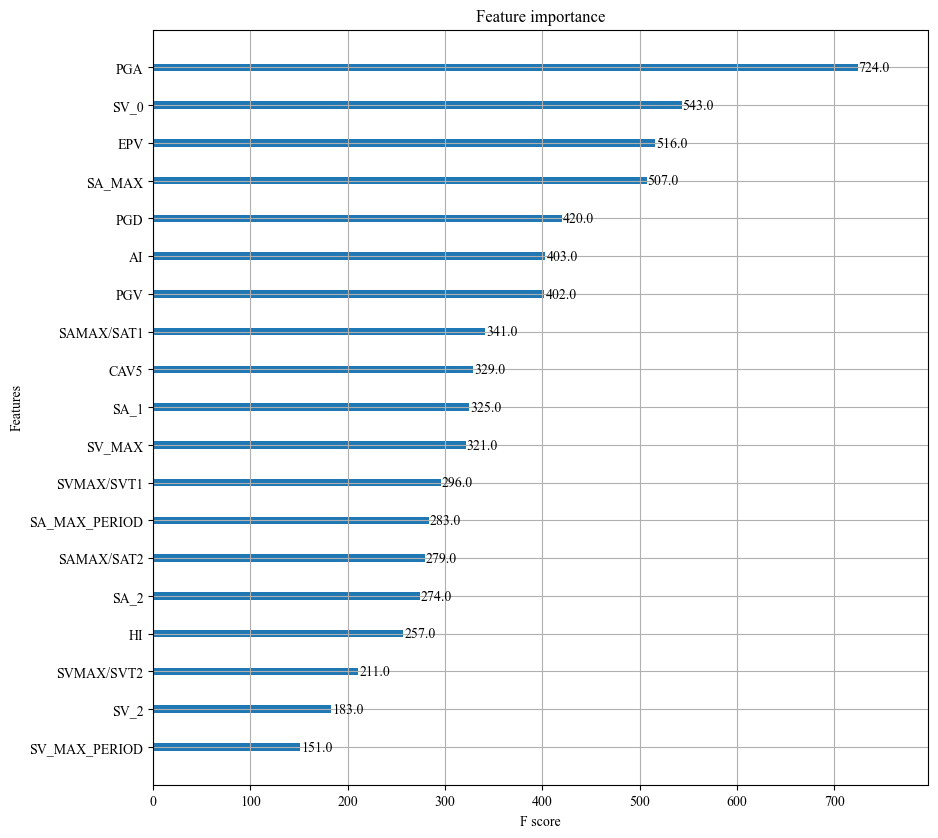

In [4]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=100)
plot_importance(model,ax=ax)
plt.show()

R2 = 0.95926
MSE = 0.38350
RMSE = 0.61927
MAE = 0.18648
MAPE = 1.03094
[[0.97120138]] [0.04917508]


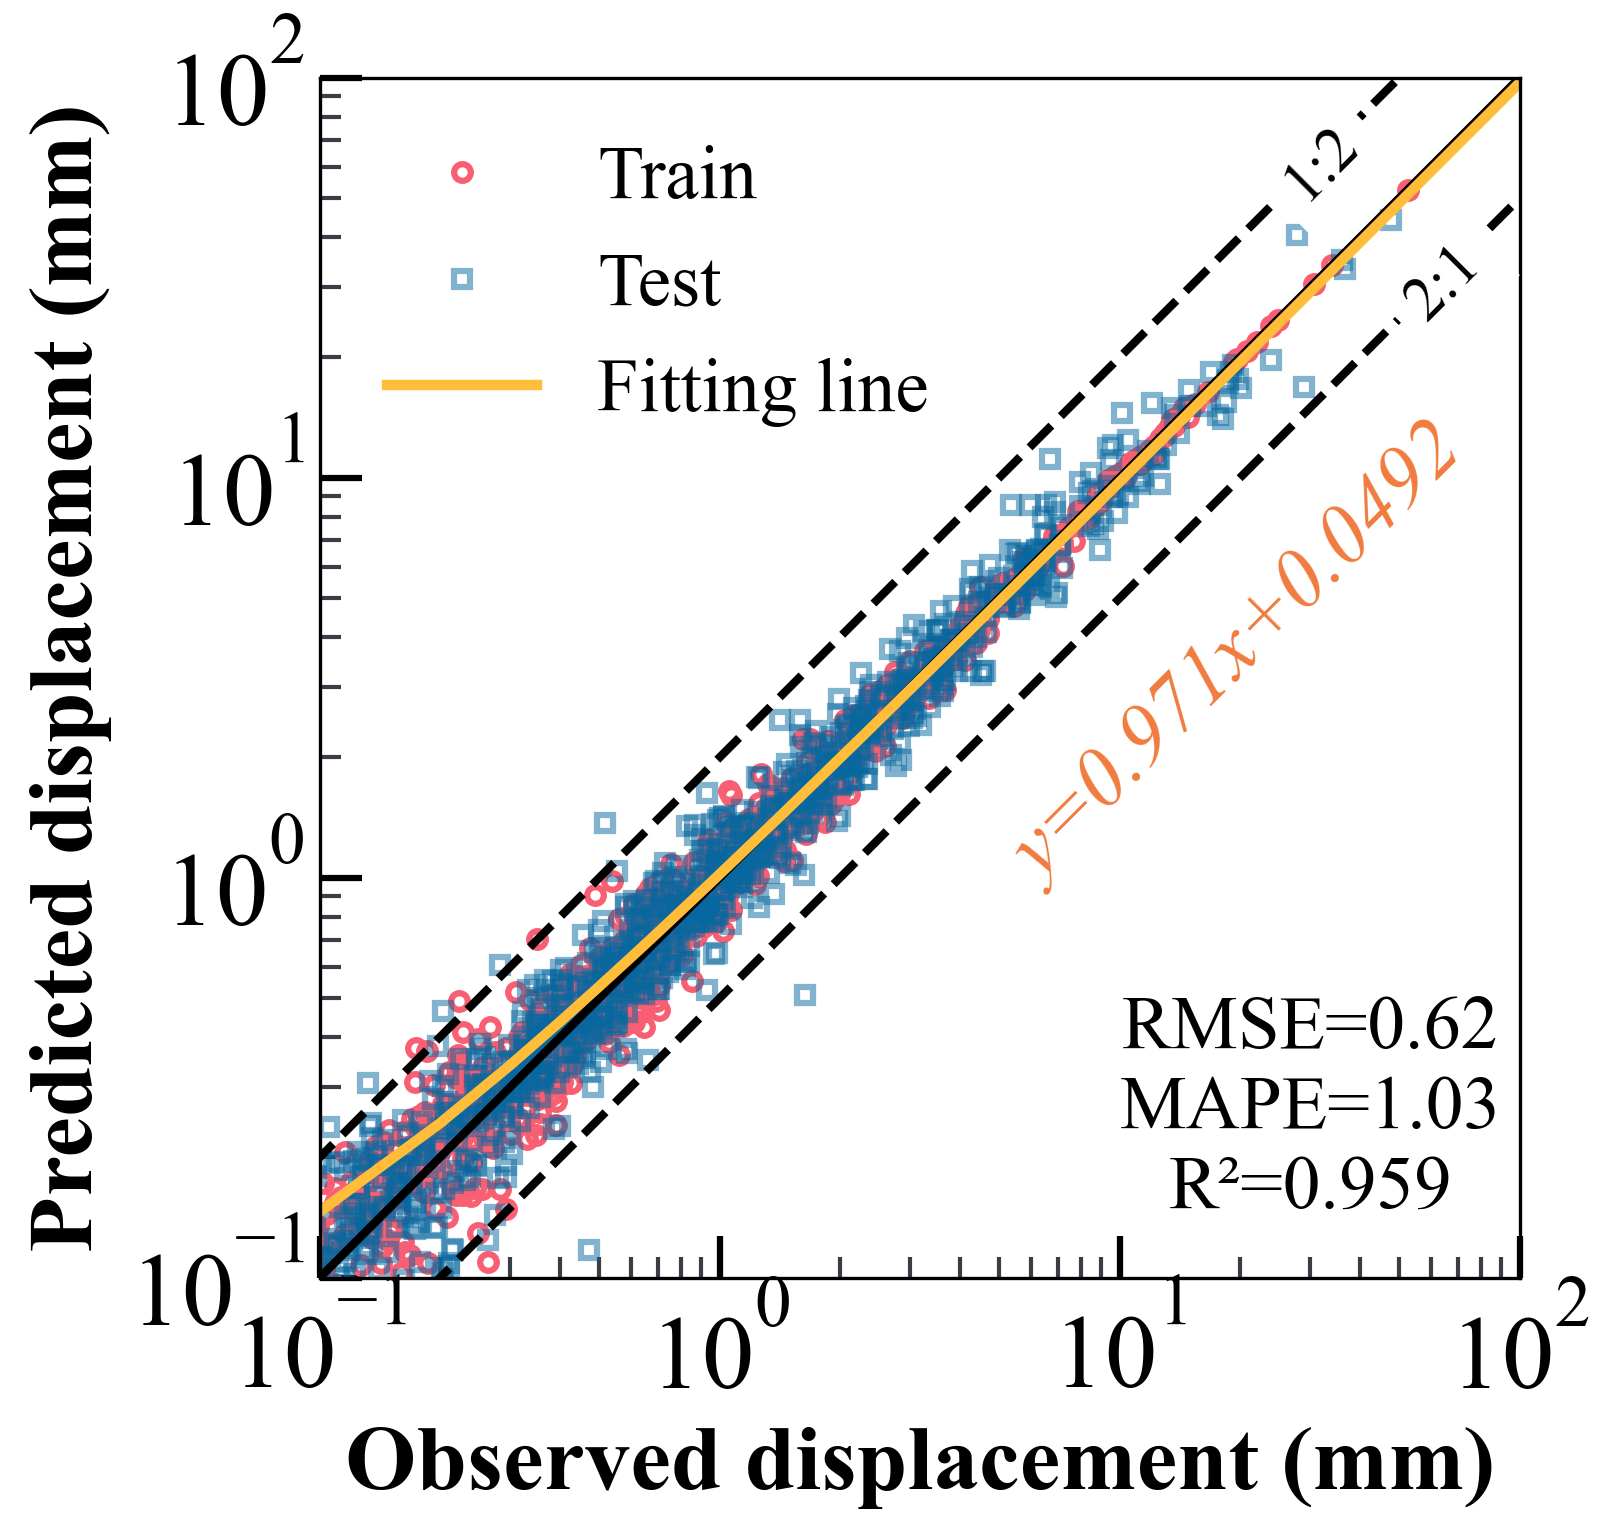

In [5]:
x=np.arange(0,100,0.1).reshape(-1,1)
y=x

X_train=X_train.iloc[:1500,:]
Train_predicted=model.predict(X_train)
y_train=y_train.iloc[:1500]

y_train=np.array([y_train])
Test_predicted=Test_predicted.flatten()
y_test=y_test.flatten()
y_train=y_train.flatten()

Test=np.hstack([y_train,y_test[:1500]])
Predict=np.hstack([Train_predicted,Test_predicted[:1500]])


model = LinearRegression() # 构建线性模型
model.fit(y_test.reshape(-1,1), Test_predicted.reshape(-1,1)) # 自变量在前，因变量在后
# model.fit(Test.reshape(-1,1), Predict.reshape(-1,1)) # 自变量在前，因变量在后
predicts = model.predict(x) # 预测值

coef = model.coef_ # 斜率
intercept = model.intercept_ # 截距

R2 = metrics.r2_score(Test_predicted,y_test)
MSE = metrics.mean_squared_error(Test_predicted,y_test)
RMSE = metrics.mean_squared_error(Test_predicted,y_test)**0.5
MAE = metrics.mean_absolute_error(Test_predicted,y_test)
MAPE = metrics.mean_absolute_percentage_error(Test_predicted,y_test)
# R2 =cross_val_score(model,x, predicts,cv=10,scoring="r2").mean()
print('R2 = %.5f' % R2) # 输出 R2
print('MSE = %.5f' % MSE) # 输出 MSE
print('RMSE = %.5f' % RMSE) # 输出 RMSE
print('MAE = %.5f' % MAE) # 输出 MAE
print('MAPE = %.5f' % MAPE) # 输出 MAPE

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
font_Times_New_Roman={"family":"Times New Roman",
                    "weight":"heavy",
                    "size":22}
font_label={"family":"Times New Roman",
                    "size":18}

#坐标轴字体
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
ax.loglog(y_train, Train_predicted,linestyle='',marker='o',markersize=4,markerfacecolor='none',markeredgecolor='#f85f73',markeredgewidth=1.5,label='Train')
ax.loglog(y_test[:1500], Test_predicted[:1500],linestyle='',marker='s',markersize=4,markerfacecolor='none',markeredgecolor='#07689f',markeredgewidth=1.5,label='Test',alpha=0.5)

ax.plot(x, y,color='k',linestyle='-',linewidth=2)
ax.plot(x, 2*x,color='k',linestyle='--',linewidth=2)
ax.plot(x, 0.5*x,color='k',linestyle='--',linewidth=2)
ax.plot(x,coef*x+intercept,color='#ffbd39',label='Fitting line',linewidth=2.5)

ax.set_xlabel("Observed displacement (mm)",fontproperties=font_Times_New_Roman)                        
ax.set_ylabel("Predicted displacement (mm)",fontproperties=font_Times_New_Roman)
ax.tick_params(axis='x',which='major',direction='in',labelsize=25,length=10,width=1.5)    #主刻度x：朝向、长短、大小
ax.tick_params(axis='x',which='minor',direction='in',color='#393e46',labelsize=14,length=5,width=1)    #副刻度x
ax.tick_params(axis='y',which='major',direction='in',labelsize=25,length=10,width=1.5)     #主刻度x
ax.tick_params(axis='y',which='minor',direction='in',color='#393e46',labelsize=14,length=5,width=1)    #副刻度y
ax.set_xlim([0.1,100])
ax.set_ylim([0.1,100])
plt.text(30,0.15,
        'RMSE={:.3g}\nMAPE={:.3g}\nR²={:.3g}'.format(float(0.62),float(1.031),float(0.959)),
        fontsize=18,ha='center')

plt.text(32,50,'1:2',fontsize=15,ha='center',rotation=45,backgroundcolor='white')
plt.text(65,25,'2:1',fontsize=15,ha='center',rotation=45,backgroundcolor='white')
print(coef,intercept)
plt.text(20,1,'y={:.3g}x+{:.3g}'.format(float(coef),float(intercept)),fontsize=20,ha='center',rotation=45,style = "italic",color='#f07b3f')

plt.legend(frameon=False,prop=font_label)
plt.savefig('E:\\PyCharm\\PythonProject\\Transformer_response predict\\cowtransfer\\XGBOOST.png', bbox_inches='tight')

# KNN

R2 = 0.74622
MSE = 1.61829
RMSE = 1.27212
MAE = 0.58811
MAPE = 1.44511
[[0.75155961]] [0.07249197]


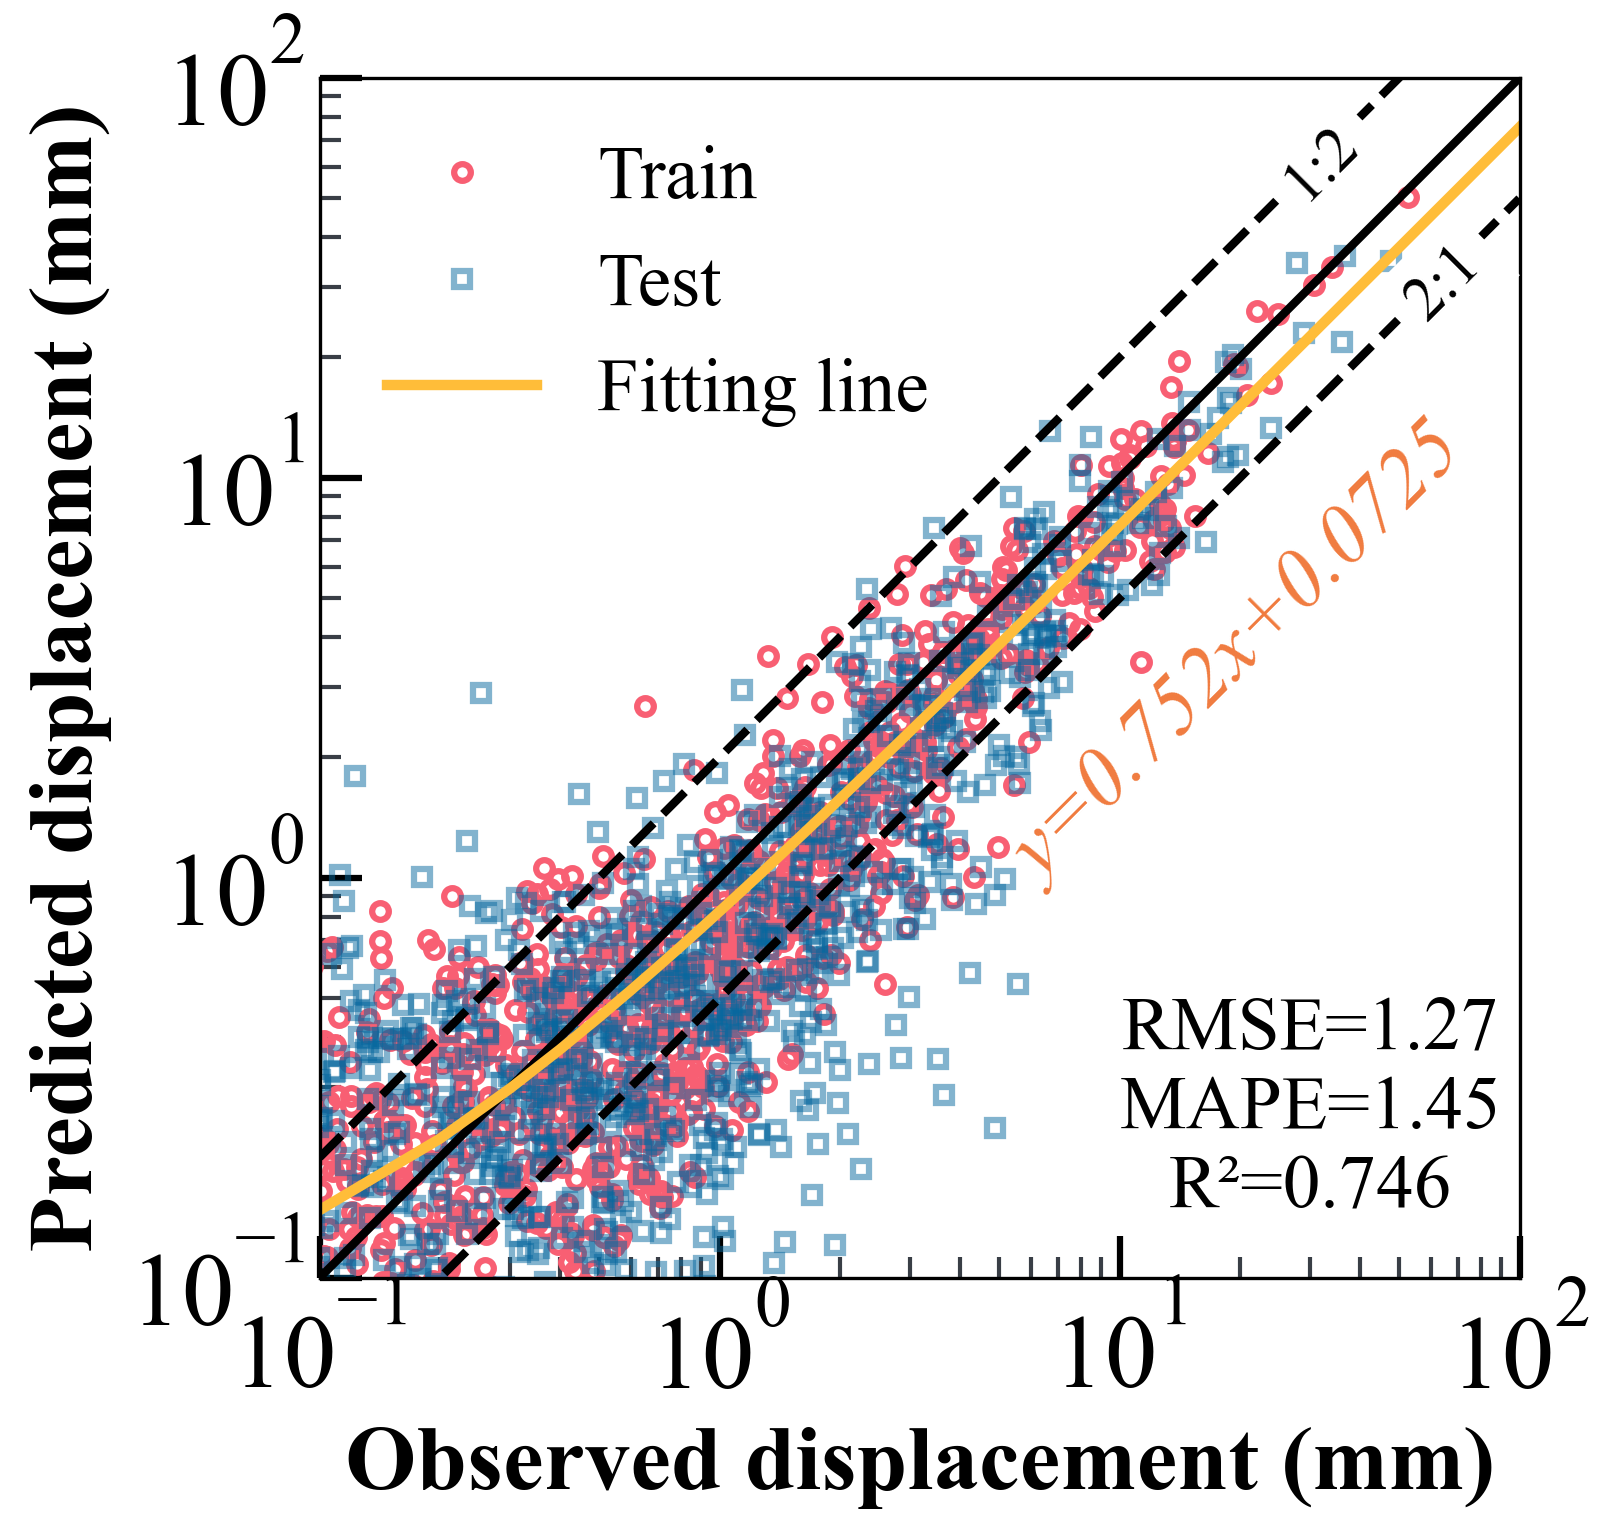

In [6]:
from sklearn.neighbors import KNeighborsRegressor
X_train,X_test,y_train,y_test=train_test_split(feature,target,random_state=5,test_size=0.2)
clf = KNeighborsRegressor(n_neighbors=5)
clf.fit(X_train,y_train)
Test_predicted=clf.predict(X_test)
y_test=np.array([y_test])
Test_predicted=np.array([Test_predicted])

x=np.arange(0.1,100,0.1).reshape(-1,1)
y=x

X_train=X_train.iloc[:1500,:]
Train_predicted=clf.predict(X_train)
y_train=y_train.iloc[:1500]

y_train=np.array([y_train])
Test_predicted=Test_predicted.flatten()
y_test=y_test.flatten()
y_train=y_train.flatten()

Test=np.hstack([y_train,y_test[:1500]])
Predict=np.hstack([Train_predicted,Test_predicted[:1500]])

model = LinearRegression() # 构建线性模型
model.fit(y_test.reshape(-1,1), Test_predicted.reshape(-1,1)) # 自变量在前，因变量在后
# model.fit(Test.reshape(-1,1), Predict.reshape(-1,1)) # 自变量在前，因变量在后
predicts = model.predict(x) # 预测值

coef = model.coef_ # 斜率
intercept = model.intercept_ # 截距

R2 = metrics.r2_score(Test_predicted,y_test)
MSE = metrics.mean_squared_error(Test_predicted,y_test)
RMSE = metrics.mean_squared_error(Test_predicted,y_test)**0.5
MAE = metrics.mean_absolute_error(Test_predicted,y_test)
MAPE = metrics.mean_absolute_percentage_error(Test_predicted,y_test)
# R2 =cross_val_score(model,x, predicts,cv=10,scoring="r2").mean()
print('R2 = %.5f' % R2) # 输出 R2
print('MSE = %.5f' % MSE) # 输出 MSE
print('RMSE = %.5f' % RMSE) # 输出 RMSE
print('MAE = %.5f' % MAE) # 输出 MAE
print('MAPE = %.5f' % MAPE) # 输出 MAPE

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
font_Times_New_Roman={"family":"Times New Roman",
                    "weight":"heavy",
                    "size":22}
font_label={"family":"Times New Roman",
                    "size":18}

#坐标轴字体
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
ax.loglog(y_train, Train_predicted,linestyle='',marker='o',markersize=4,markerfacecolor='none',markeredgecolor='#f85f73',markeredgewidth=1.5,label='Train')
ax.loglog(y_test[:1500], Test_predicted[:1500],linestyle='',marker='s',markersize=4,markerfacecolor='none',markeredgecolor='#07689f',markeredgewidth=1.5,label='Test',alpha=0.5)

ax.plot(x, y,color='k',linestyle='-',linewidth=2)
ax.plot(x, 2*x,color='k',linestyle='--',linewidth=2)
ax.plot(x, 0.5*x,color='k',linestyle='--',linewidth=2)
ax.plot(x,coef*x+intercept,color='#ffbd39',label='Fitting line',linewidth=2.5)

ax.set_xlabel("Observed displacement (mm)",fontproperties=font_Times_New_Roman)                        
ax.set_ylabel("Predicted displacement (mm)",fontproperties=font_Times_New_Roman)
ax.tick_params(axis='x',which='major',direction='in',labelsize=25,length=10,width=1.5)    #主刻度x：朝向、长短、大小
ax.tick_params(axis='x',which='minor',direction='in',color='#393e46',labelsize=14,length=5,width=1)    #副刻度x
ax.tick_params(axis='y',which='major',direction='in',labelsize=25,length=10,width=1.5)     #主刻度x
ax.tick_params(axis='y',which='minor',direction='in',color='#393e46',labelsize=14,length=5,width=1)    #副刻度y
ax.set_xlim([0.1,100])
ax.set_ylim([0.1,100])
plt.text(30,0.15,
        'RMSE={:.3g}\nMAPE={:.3g}\nR²={:.3g}'.format(float(1.27),float(1.45),float(0.746)),
        fontsize=18,ha='center')

plt.text(32,50,'1:2',fontsize=15,ha='center',rotation=45,backgroundcolor='white')
plt.text(65,25,'2:1',fontsize=15,ha='center',rotation=45,backgroundcolor='white')
print(coef,intercept)
plt.text(20,1,'y={:.3g}x+{:.3g}'.format(float(coef),float(intercept)),fontsize=20,ha='center',rotation=45,style = "italic",color='#f07b3f')

plt.legend(frameon=False,prop=font_label)
plt.savefig('E:\\PyCharm\\PythonProject\\Transformer_response predict\\cowtransfer\\KNN.png', bbox_inches='tight')

# MLR

R2 = 0.94457
MSE = 0.52292
RMSE = 0.72313
MAE = 0.28199
MAPE = 1.06091
[[0.96499259]] [0.05963328]


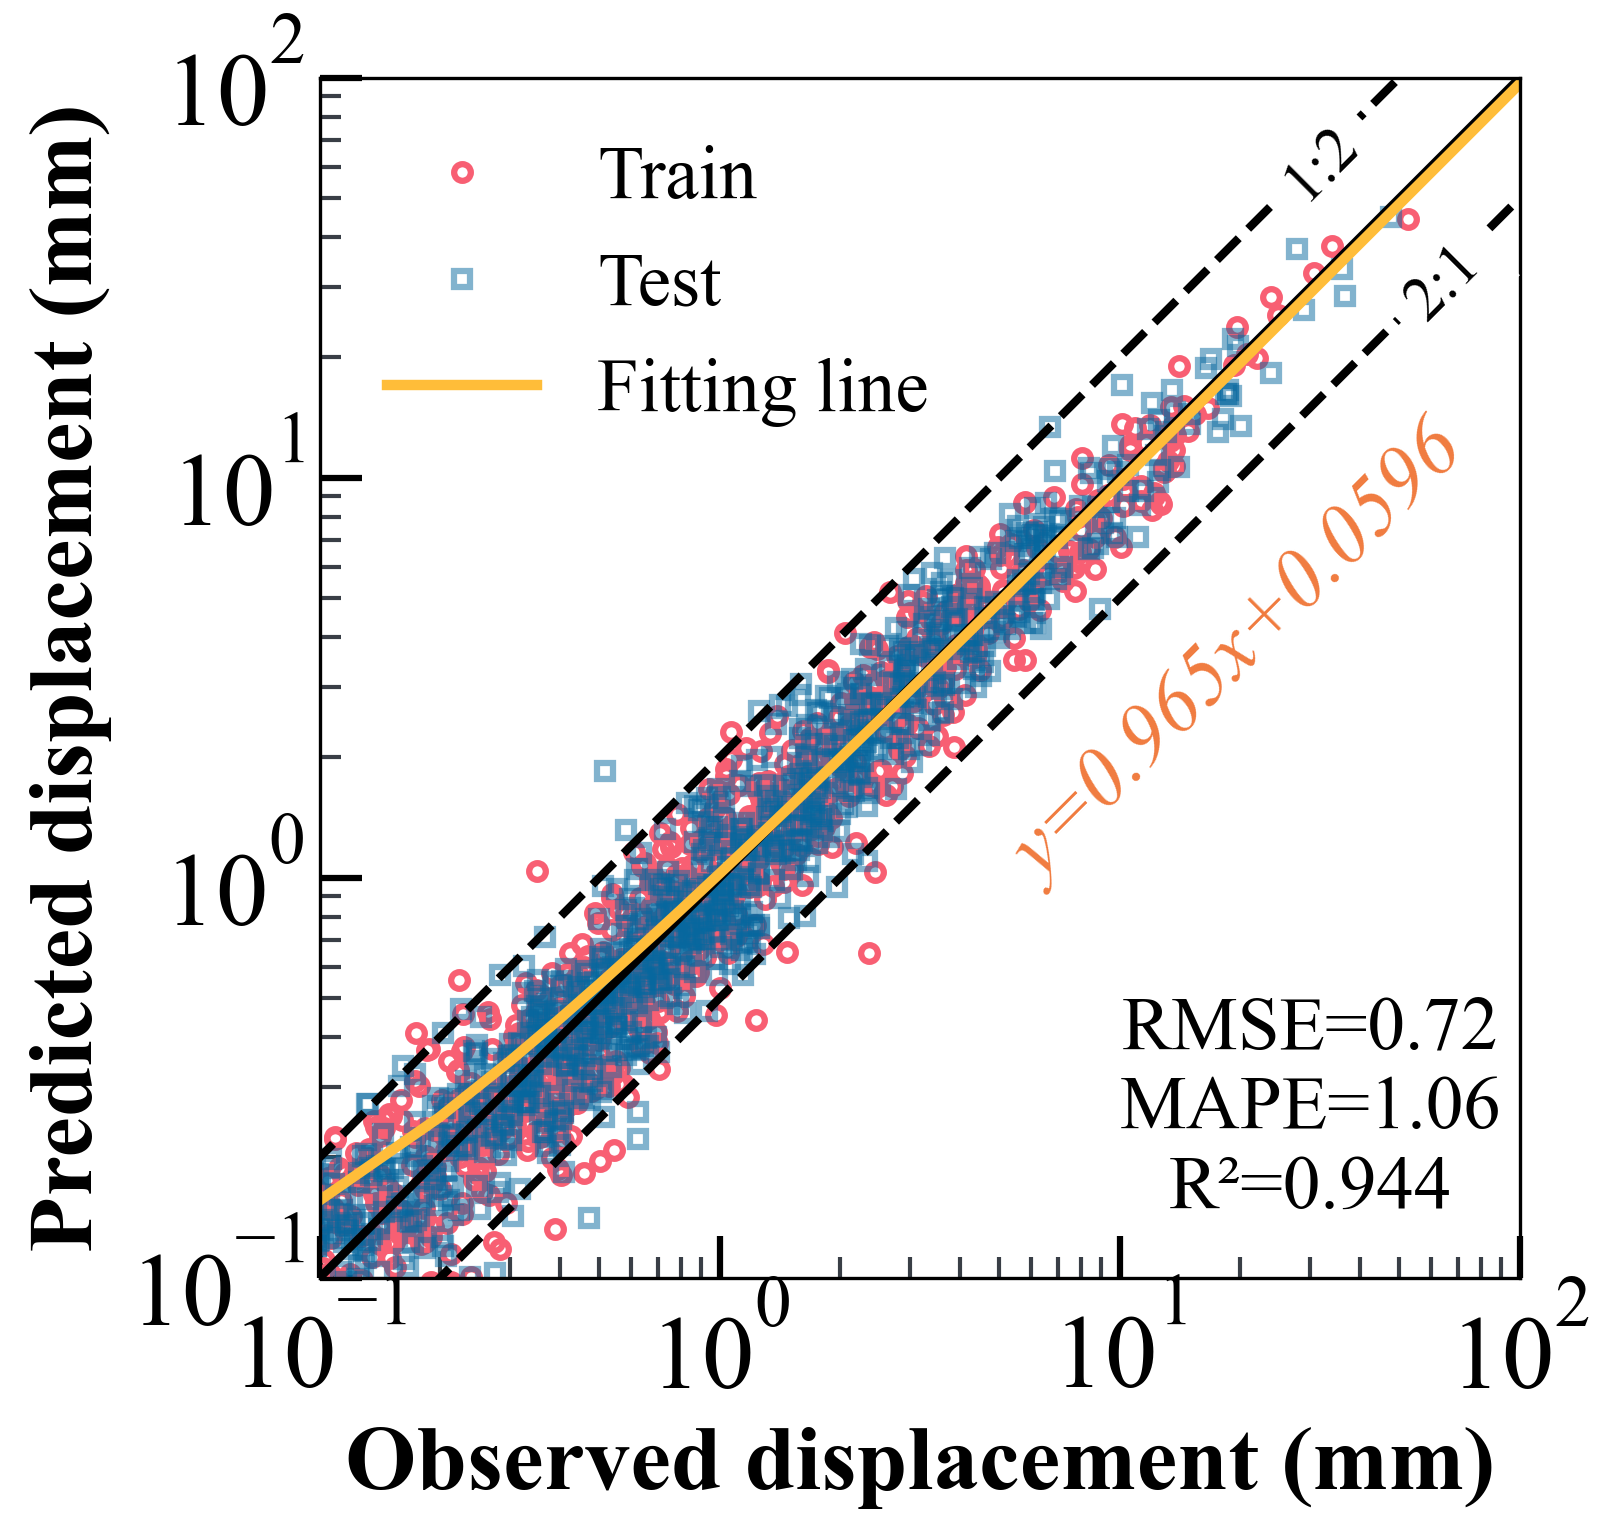

In [7]:
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(feature,target,random_state=5,test_size=0.2)
mlr = LinearRegression()
mlr.fit(X_train,y_train)
Test_predicted=mlr.predict(X_test)
y_test=np.array([y_test])
Test_predicted=np.array([Test_predicted])


x=np.arange(0,100,0.1).reshape(-1,1)
y=x

X_train=X_train.iloc[:1500,:]
Train_predicted=mlr.predict(X_train)
y_train=y_train.iloc[:1500]

y_train=np.array([y_train])
Test_predicted=Test_predicted.flatten()
y_test=y_test.flatten()
y_train=y_train.flatten()

Test=np.hstack([y_train,y_test[:1500]])
Predict=np.hstack([Train_predicted,Test_predicted[:1500]])

model = LinearRegression() # 构建线性模型
model.fit(y_test.reshape(-1,1), Test_predicted.reshape(-1,1)) # 自变量在前，因变量在后
# model.fit(Test.reshape(-1,1), Predict.reshape(-1,1)) # 自变量在前，因变量在后
predicts = model.predict(x) # 预测值

coef = model.coef_ # 斜率
intercept = model.intercept_ # 截距

R2 = metrics.r2_score(Test_predicted,y_test)
MSE = metrics.mean_squared_error(Test_predicted,y_test)
RMSE = metrics.mean_squared_error(Test_predicted,y_test)**0.5
MAE = metrics.mean_absolute_error(Test_predicted,y_test)
MAPE = metrics.mean_absolute_percentage_error(Test_predicted,y_test)
# R2 =cross_val_score(model,x, predicts,cv=10,scoring="r2").mean()
print('R2 = %.5f' % R2) # 输出 R2
print('MSE = %.5f' % MSE) # 输出 MSE
print('RMSE = %.5f' % RMSE) # 输出 RMSE
print('MAE = %.5f' % MAE) # 输出 MAE
print('MAPE = %.5f' % MAPE) # 输出 MAPE

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
font_Times_New_Roman={"family":"Times New Roman",
                    "weight":"heavy",
                    "size":22}
font_label={"family":"Times New Roman",
                    "size":18}

#坐标轴字体
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
ax.loglog(y_train, Train_predicted,linestyle='',marker='o',markersize=4,markerfacecolor='none',markeredgecolor='#f85f73',markeredgewidth=1.5,label='Train')
ax.loglog(y_test[:1500], Test_predicted[:1500],linestyle='',marker='s',markersize=4,markerfacecolor='none',markeredgecolor='#07689f',markeredgewidth=1.5,label='Test',alpha=0.5)

ax.plot(x, y,color='k',linestyle='-',linewidth=2)
ax.plot(x, 2*x,color='k',linestyle='--',linewidth=2)
ax.plot(x, 0.5*x,color='k',linestyle='--',linewidth=2)
ax.plot(x,coef*x+intercept,color='#ffbd39',label='Fitting line',linewidth=2.5)

ax.set_xlabel("Observed displacement (mm)",fontproperties=font_Times_New_Roman)                        
ax.set_ylabel("Predicted displacement (mm)",fontproperties=font_Times_New_Roman)
ax.tick_params(axis='x',which='major',direction='in',labelsize=25,length=10,width=1.5)    #主刻度x：朝向、长短、大小
ax.tick_params(axis='x',which='minor',direction='in',color='#393e46',labelsize=14,length=5,width=1)    #副刻度x
ax.tick_params(axis='y',which='major',direction='in',labelsize=25,length=10,width=1.5)     #主刻度x
ax.tick_params(axis='y',which='minor',direction='in',color='#393e46',labelsize=14,length=5,width=1)    #副刻度y
ax.set_xlim([0.1,100])
ax.set_ylim([0.1,100])
plt.text(30,0.15,
        'RMSE={:.3g}\nMAPE={:.3g}\nR²={:.3g}'.format(float(0.72),float(1.061),float(0.944)),
        fontsize=18,ha='center')

plt.text(32,50,'1:2',fontsize=15,ha='center',rotation=45,backgroundcolor='white')
plt.text(65,25,'2:1',fontsize=15,ha='center',rotation=45,backgroundcolor='white')
print(coef,intercept)
plt.text(20,1,'y={:.3g}x+{:.3g}'.format(float(coef),float(intercept)),fontsize=20,ha='center',rotation=45,style = "italic",color='#f07b3f')

plt.legend(frameon=False,prop=font_label)
plt.savefig('E:\\PyCharm\\PythonProject\\Transformer_response predict\\cowtransfer\\MLR.png', bbox_inches='tight')

# Lasso

R2 = 0.93768
MSE = 0.58081
RMSE = 0.76211
MAE = 0.30918
MAPE = 2.02138
[[0.95600866]] [0.06835158]


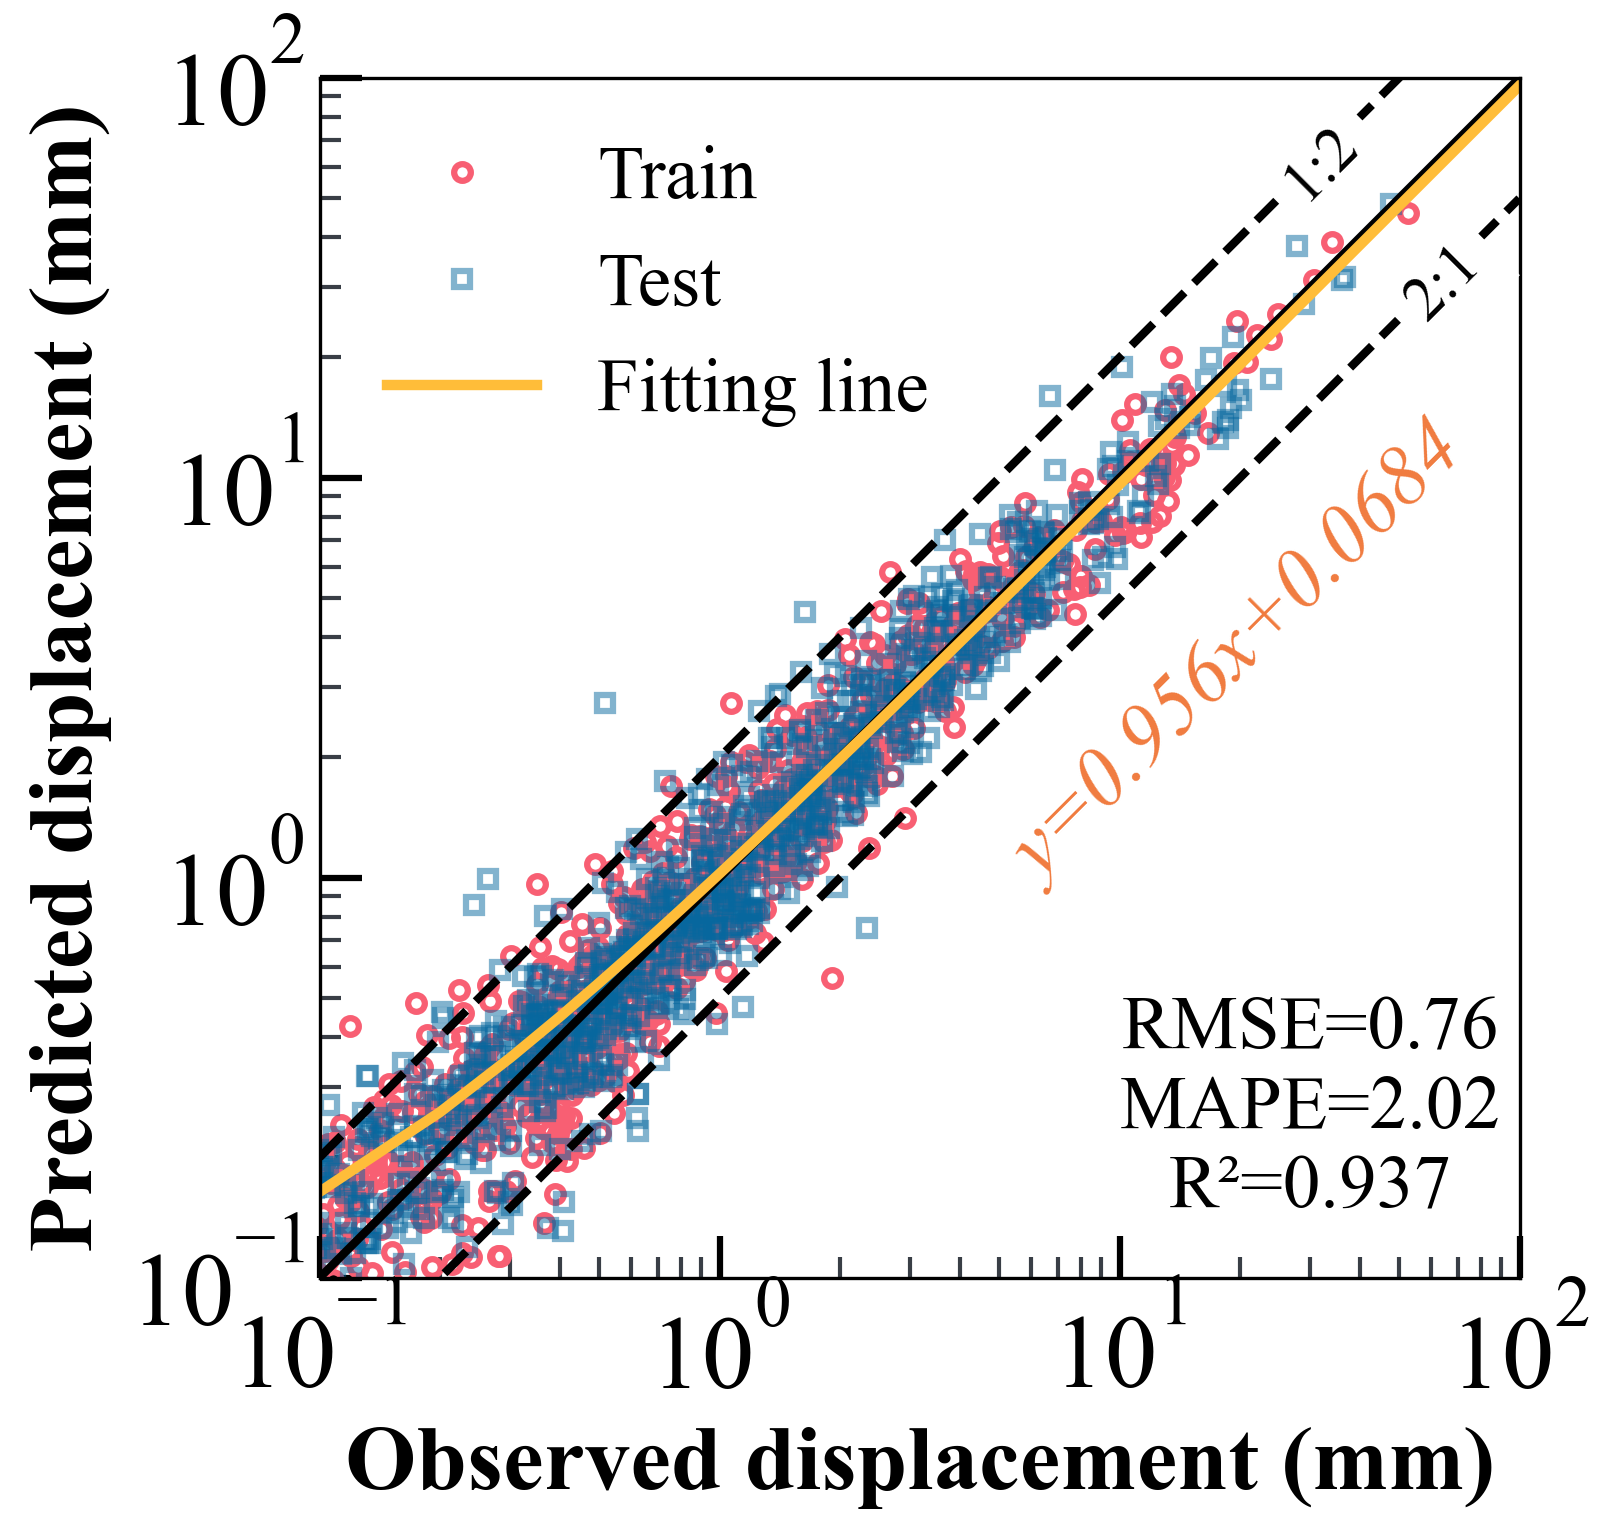

In [8]:
from sklearn.linear_model import LassoCV
X_train,X_test,y_train,y_test=train_test_split(feature,target,random_state=5,test_size=0.2)
lasso = LassoCV()
lasso.fit(X_train,y_train)
Test_predicted=lasso.predict(X_test)
y_test=np.array([y_test])
Test_predicted=np.array([Test_predicted])

x=np.arange(0.1,100,0.1).reshape(-1,1)
y=x

X_train=X_train.iloc[:1500,:]
Train_predicted=lasso.predict(X_train)
y_train=y_train.iloc[:1500]

y_train=np.array([y_train])
Test_predicted=Test_predicted.flatten()
y_test=y_test.flatten()
y_train=y_train.flatten()

Test=np.hstack([y_train,y_test[:1500]])
Predict=np.hstack([Train_predicted,Test_predicted[:1500]])

model = LinearRegression() # 构建线性模型
model.fit(y_test.reshape(-1,1), Test_predicted.reshape(-1,1)) # 自变量在前，因变量在后
# model.fit(Test.reshape(-1,1), Predict.reshape(-1,1)) # 自变量在前，因变量在后
predicts = model.predict(x) # 预测值

coef = model.coef_ # 斜率
intercept = model.intercept_ # 截距

R2 = metrics.r2_score(Test_predicted,y_test)
MSE = metrics.mean_squared_error(Test_predicted,y_test)
RMSE = metrics.mean_squared_error(Test_predicted,y_test)**0.5
MAE = metrics.mean_absolute_error(Test_predicted,y_test)
MAPE = metrics.mean_absolute_percentage_error(Test_predicted,y_test)
# R2 =cross_val_score(model,x, predicts,cv=10,scoring="r2").mean()
print('R2 = %.5f' % R2) # 输出 R2
print('MSE = %.5f' % MSE) # 输出 MSE
print('RMSE = %.5f' % RMSE) # 输出 RMSE
print('MAE = %.5f' % MAE) # 输出 MAE
print('MAPE = %.5f' % MAPE) # 输出 MAPE

# from jupyterthemes import jtplot
# jtplot.style(theme='grade3') #选择一个绘图主题
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
font_Times_New_Roman={"family":"Times New Roman",
                    "weight":"heavy",
                    "size":22}
font_label={"family":"Times New Roman",
                    "size":18}

#坐标轴字体
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
ax.loglog(y_train, Train_predicted,linestyle='',marker='o',markersize=4,markerfacecolor='none',markeredgecolor='#f85f73',markeredgewidth=1.5,label='Train')
ax.loglog(y_test[:1500], Test_predicted[:1500],linestyle='',marker='s',markersize=4,markerfacecolor='none',markeredgecolor='#07689f',markeredgewidth=1.5,label='Test',alpha=0.5)

ax.plot(x, y,color='k',linestyle='-',linewidth=2)
ax.plot(x, 2*x,color='k',linestyle='--',linewidth=2)
ax.plot(x, 0.5*x,color='k',linestyle='--',linewidth=2)
ax.plot(x,coef*x+intercept,color='#ffbd39',label='Fitting line',linewidth=2.5)

ax.set_xlabel("Observed displacement (mm)",fontproperties=font_Times_New_Roman)                        
ax.set_ylabel("Predicted displacement (mm)",fontproperties=font_Times_New_Roman)
ax.tick_params(axis='x',which='major',direction='in',labelsize=25,length=10,width=1.5)    #主刻度x：朝向、长短、大小
ax.tick_params(axis='x',which='minor',direction='in',color='#393e46',labelsize=14,length=5,width=1)    #副刻度x
ax.tick_params(axis='y',which='major',direction='in',labelsize=25,length=10,width=1.5)     #主刻度x
ax.tick_params(axis='y',which='minor',direction='in',color='#393e46',labelsize=14,length=5,width=1)    #副刻度y
ax.set_xlim([0.1,100])
ax.set_ylim([0.1,100])
plt.text(30,0.15,
        'RMSE={:.3g}\nMAPE={:.3g}\nR²={:.3g}'.format(float(0.76),float(2.021),float(0.937)),
        fontsize=18,ha='center')

plt.text(32,50,'1:2',fontsize=15,ha='center',rotation=45,backgroundcolor='white')
plt.text(65,25,'2:1',fontsize=15,ha='center',rotation=45,backgroundcolor='white')
print(coef,intercept)
plt.text(20,1,'y={:.3g}x+{:.3g}'.format(float(coef),float(intercept)),fontsize=20,ha='center',rotation=45,style = "italic",color='#f07b3f')

plt.legend(frameon=False,prop=font_label)
plt.savefig('E:\\PyCharm\\PythonProject\\Transformer_response predict\\cowtransfer\\LassoCV.png', bbox_inches='tight')

# plt.grid(linestyle='--',color='k',linewidth=1)
# plt.show()

# SVM

R2 = 0.95696
MSE = 0.41412
RMSE = 0.64352
MAE = 0.22695
MAPE = 0.85469
[[0.98053626]] [0.05076707]


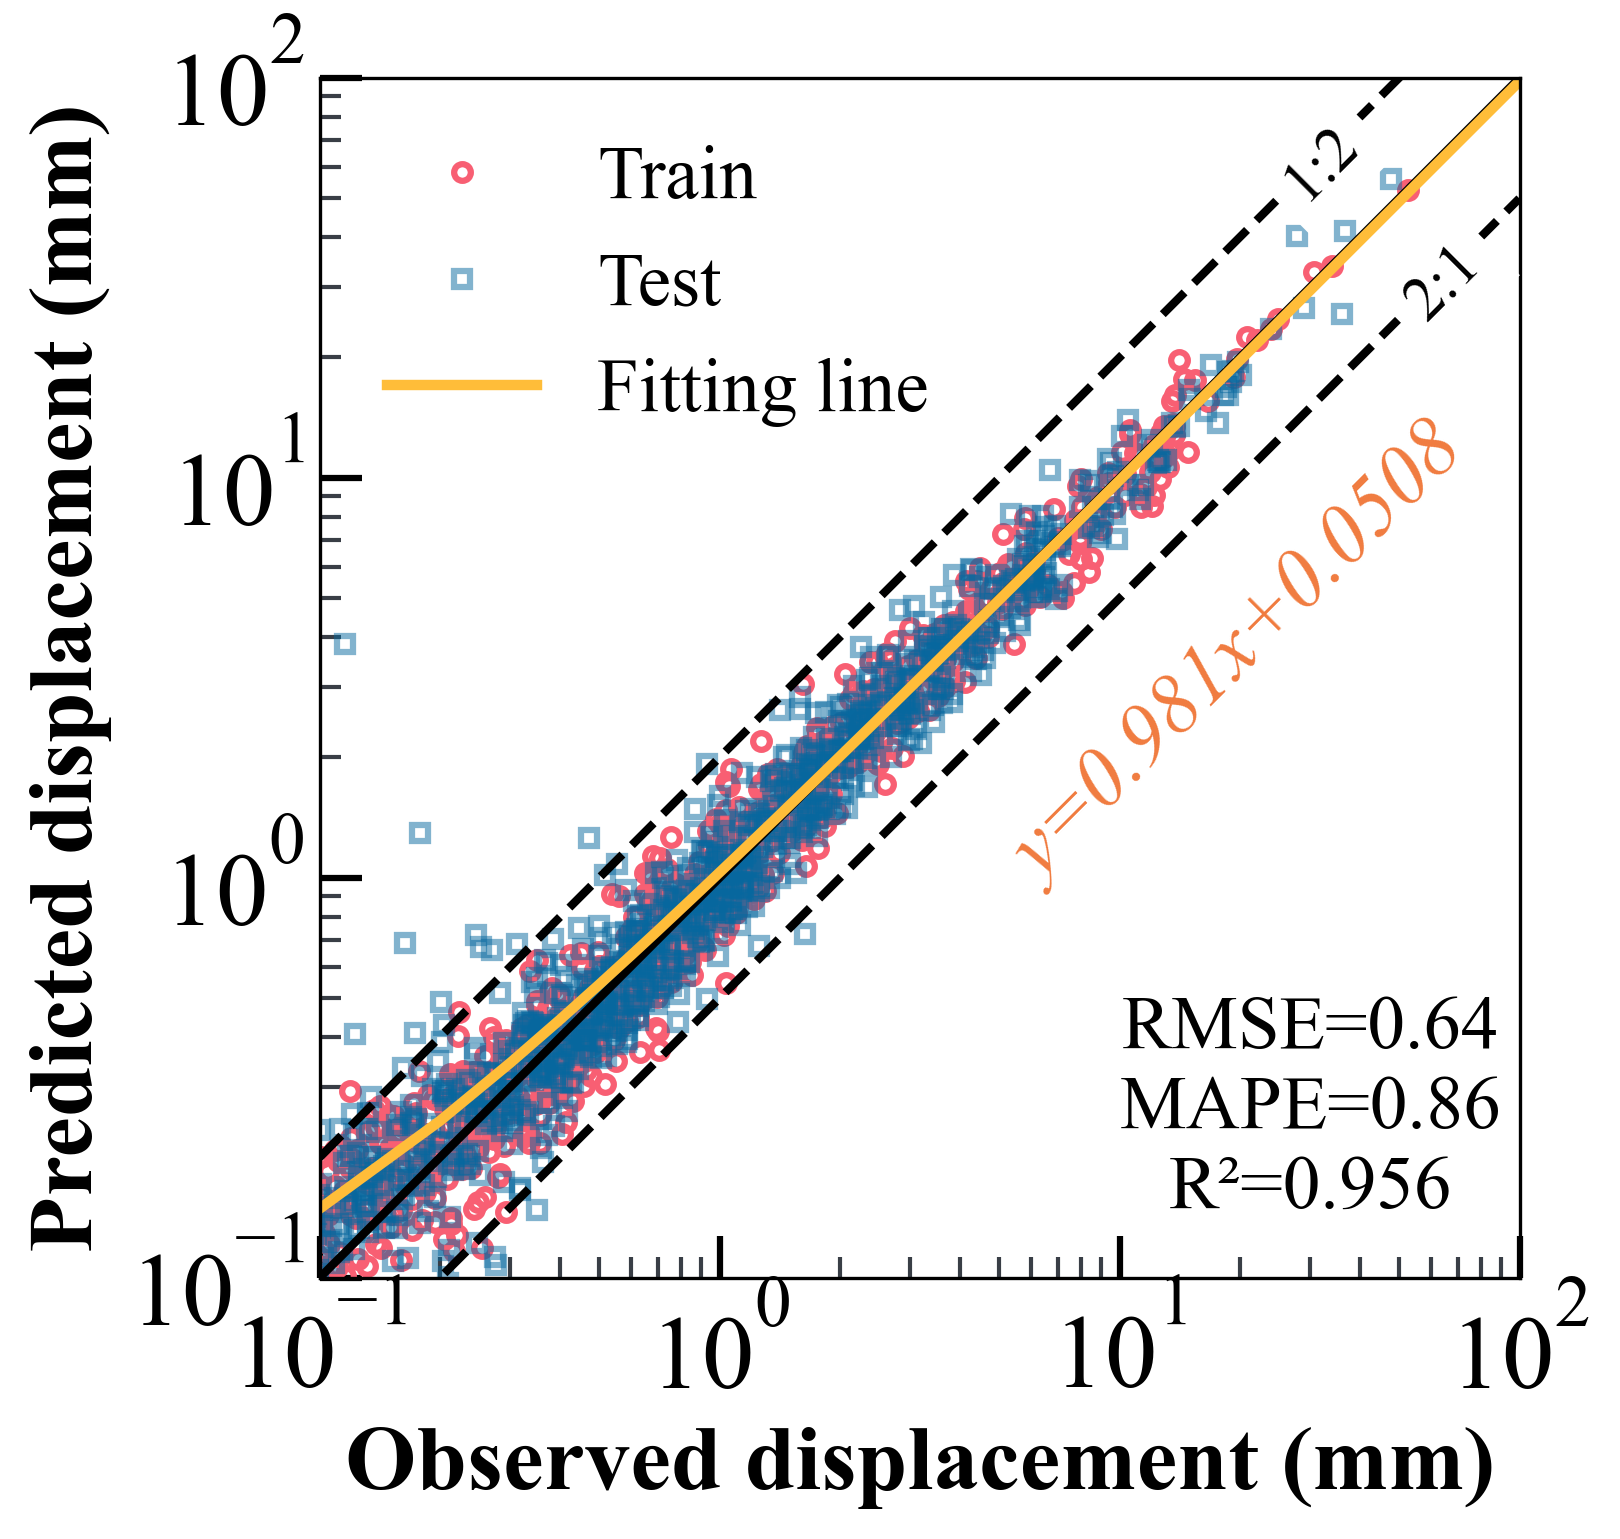

In [9]:
from sklearn.svm import SVR
X_train,X_test,y_train,y_test=train_test_split(feature,target,random_state=5,test_size=0.2)
svm = SVR(C=300,kernel='rbf', degree=3, gamma=0.01,coef0=0.0,shrinking=True,tol=0.001,cache_size=200)
svm.fit(X_train,y_train)
Test_predicted=svm.predict(X_test)
y_test=np.array([y_test])
Test_predicted=np.array([Test_predicted])

x=np.arange(0.1,100,0.1).reshape(-1,1)
y=x

X_train=X_train.iloc[:1500,:]
Train_predicted=svm.predict(X_train)
y_train=y_train.iloc[:1500]

y_train=np.array([y_train])
Test_predicted=Test_predicted.flatten()
y_test=y_test.flatten()
y_train=y_train.flatten()

Test=np.hstack([y_train,y_test[:1500]])
Predict=np.hstack([Train_predicted,Test_predicted[:1500]])

model = LinearRegression() # 构建线性模型
model.fit(y_test.reshape(-1,1), Test_predicted.reshape(-1,1)) # 自变量在前，因变量在后
# model.fit(Test.reshape(-1,1), Predict.reshape(-1,1)) # 自变量在前，因变量在后
predicts = model.predict(x) # 预测值

coef = model.coef_ # 斜率
intercept = model.intercept_ # 截距

R2 = metrics.r2_score(Test_predicted,y_test)
MSE = metrics.mean_squared_error(Test_predicted,y_test)
RMSE = metrics.mean_squared_error(Test_predicted,y_test)**0.5
MAE = metrics.mean_absolute_error(Test_predicted,y_test)
MAPE = metrics.mean_absolute_percentage_error(Test_predicted,y_test)
# R2 =cross_val_score(model,x, predicts,cv=10,scoring="r2").mean()
print('R2 = %.5f' % R2) # 输出 R2
print('MSE = %.5f' % MSE) # 输出 MSE
print('RMSE = %.5f' % RMSE) # 输出 RMSE
print('MAE = %.5f' % MAE) # 输出 MAE
print('MAPE = %.5f' % MAPE) # 输出 MAPE

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
font_Times_New_Roman={"family":"Times New Roman",
                    "weight":"heavy",
                    "size":22}
font_label={"family":"Times New Roman",
                    "size":18}

#坐标轴字体
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
ax.loglog(y_train, Train_predicted,linestyle='',marker='o',markersize=4,markerfacecolor='none',markeredgecolor='#f85f73',markeredgewidth=1.5,label='Train')
ax.loglog(y_test[:1500], Test_predicted[:1500],linestyle='',marker='s',markersize=4,markerfacecolor='none',markeredgecolor='#07689f',markeredgewidth=1.5,label='Test',alpha=0.5)

ax.plot(x, y,color='k',linestyle='-',linewidth=2)
ax.plot(x, 2*x,color='k',linestyle='--',linewidth=2)
ax.plot(x, 0.5*x,color='k',linestyle='--',linewidth=2)
ax.plot(x,coef*x+intercept,color='#ffbd39',label='Fitting line',linewidth=2.5)

ax.set_xlabel("Observed displacement (mm)",fontproperties=font_Times_New_Roman)                        
ax.set_ylabel("Predicted displacement (mm)",fontproperties=font_Times_New_Roman)
ax.tick_params(axis='x',which='major',direction='in',labelsize=25,length=10,width=1.5)    #主刻度x：朝向、长短、大小
ax.tick_params(axis='x',which='minor',direction='in',color='#393e46',labelsize=14,length=5,width=1)    #副刻度x
ax.tick_params(axis='y',which='major',direction='in',labelsize=25,length=10,width=1.5)     #主刻度x
ax.tick_params(axis='y',which='minor',direction='in',color='#393e46',labelsize=14,length=5,width=1)    #副刻度y
ax.set_xlim([0.1,100])
ax.set_ylim([0.1,100])
plt.text(30,0.15,
        'RMSE={:.3g}\nMAPE={:.3g}\nR²={:.3g}'.format(float(0.64),float(0.86),float(0.956)),
        fontsize=18,ha='center')

plt.text(32,50,'1:2',fontsize=15,ha='center',rotation=45,backgroundcolor='white')
plt.text(65,25,'2:1',fontsize=15,ha='center',rotation=45,backgroundcolor='white')
print(coef,intercept)
plt.text(20,1,'y={:.3g}x+{:.3g}'.format(float(coef),float(intercept)),fontsize=20,ha='center',rotation=45,style = "italic",color='#f07b3f')

plt.legend(frameon=False,prop=font_label)
plt.savefig('E:\\PyCharm\\PythonProject\\Transformer_response predict\\cowtransfer\\SVM.png', bbox_inches='tight')

# RF

R2 = 0.95788
MSE = 0.39689
RMSE = 0.62999
MAE = 0.19224
MAPE = 0.18175
[[0.97096991]] [0.05017849]


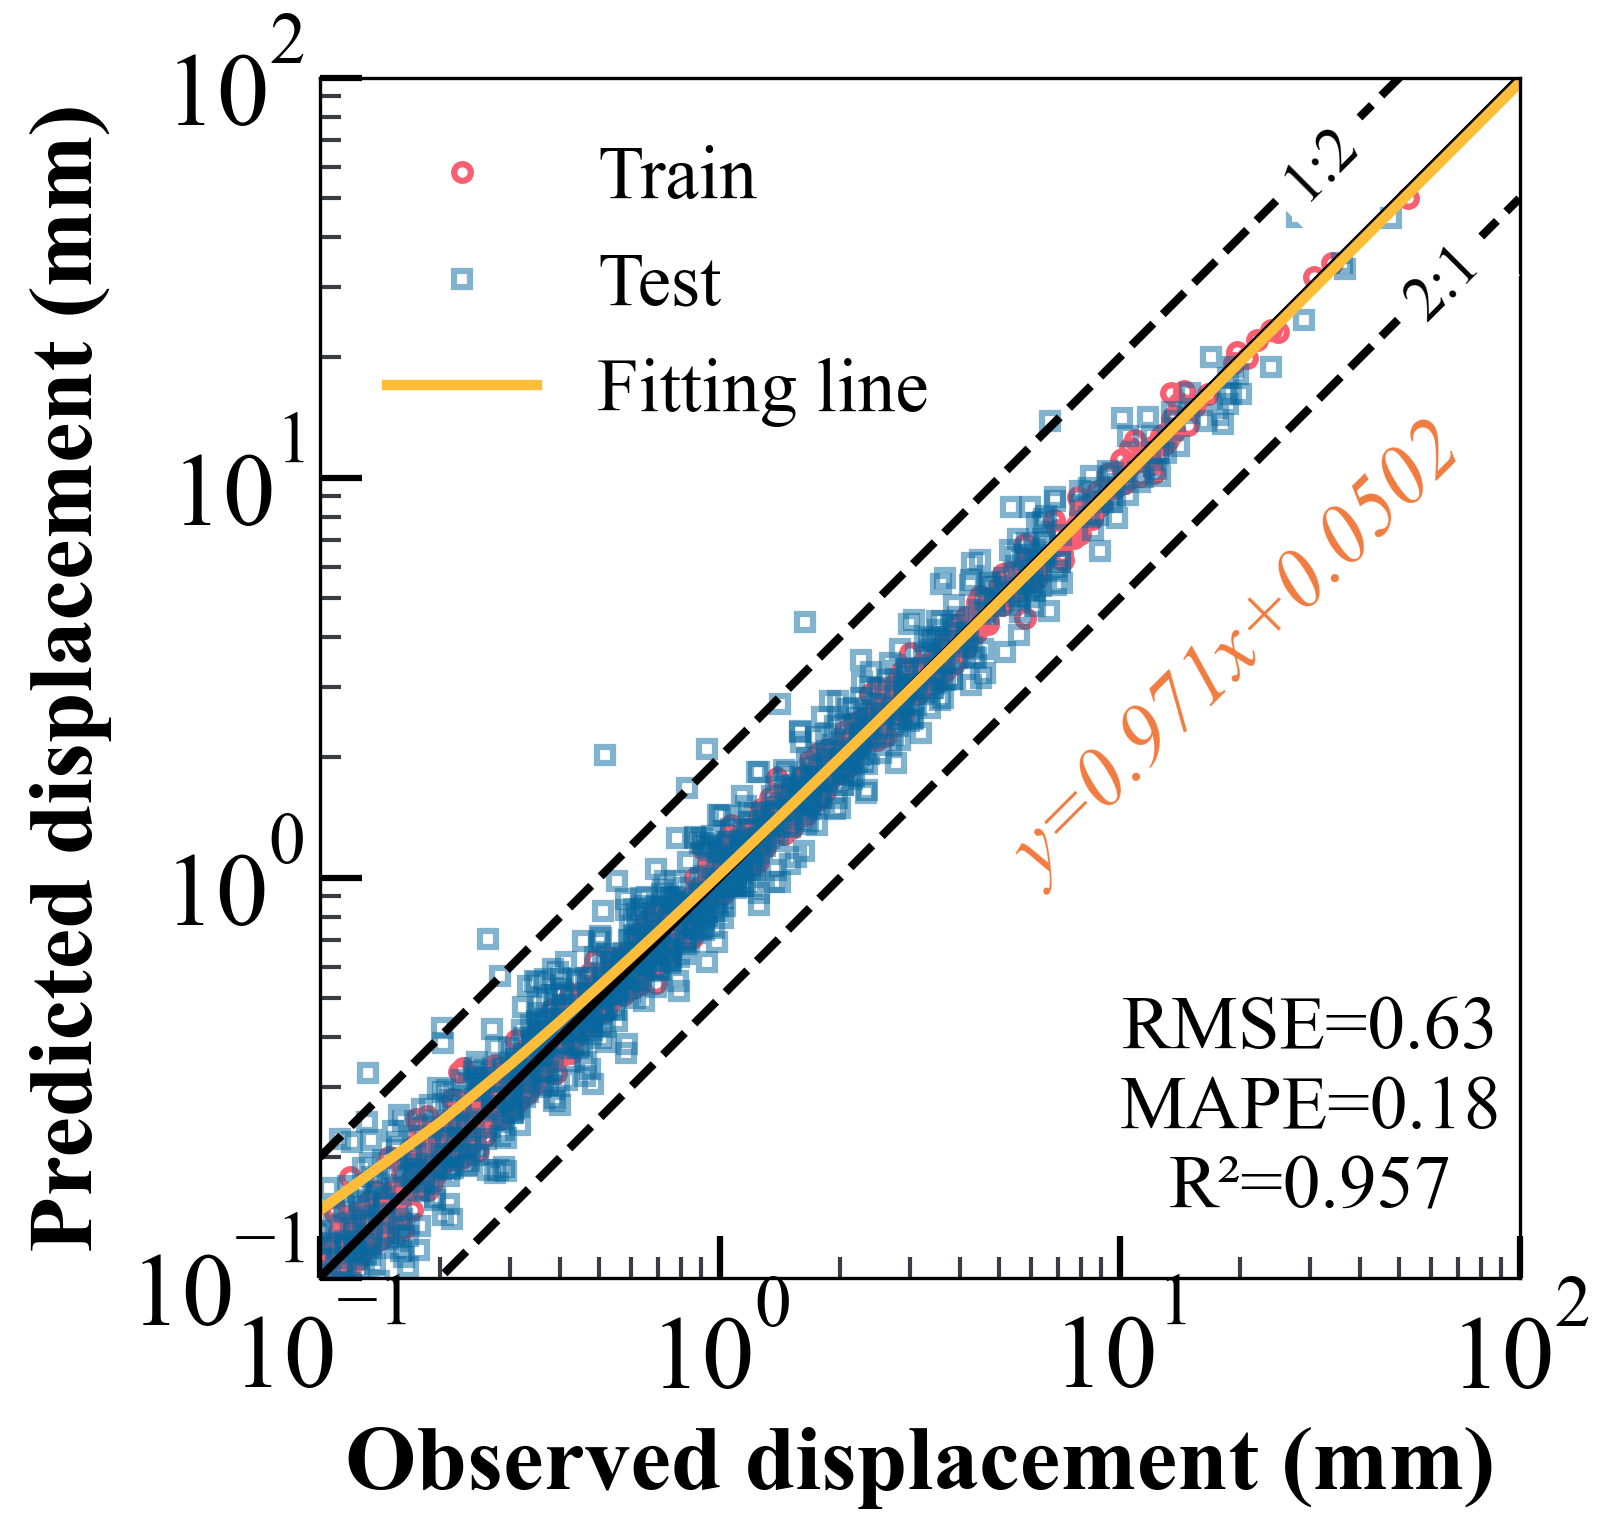

In [10]:
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test=train_test_split(feature,target,random_state=5,test_size=0.2)
rf =RandomForestRegressor(n_estimators=50)
rf.fit(X_train,y_train)
Test_predicted=rf.predict(X_test)
y_test=np.array([y_test])
Test_predicted=np.array([Test_predicted])

x=np.arange(0.1,100,0.1).reshape(-1,1)
y=x

X_train=X_train.iloc[:1500,:]
Train_predicted=rf.predict(X_train)
y_train=y_train.iloc[:1500]

y_train=np.array([y_train])
Test_predicted=Test_predicted.flatten()
y_test=y_test.flatten()
y_train=y_train.flatten()

Test=np.hstack([y_train,y_test[:1500]])
Predict=np.hstack([Train_predicted,Test_predicted[:1500]])

model = LinearRegression() # 构建线性模型
model.fit(y_test.reshape(-1,1), Test_predicted.reshape(-1,1)) # 自变量在前，因变量在后
# model.fit(Test.reshape(-1,1), Predict.reshape(-1,1)) # 自变量在前，因变量在后
predicts = model.predict(x) # 预测值

coef = model.coef_ # 斜率
intercept = model.intercept_ # 截距

R2 = metrics.r2_score(Test_predicted,y_test)
MSE = metrics.mean_squared_error(Test_predicted,y_test)
RMSE = metrics.mean_squared_error(Test_predicted,y_test)**0.5
MAE = metrics.mean_absolute_error(Test_predicted,y_test)
MAPE = metrics.mean_absolute_percentage_error(Test_predicted,y_test)
# R2 =cross_val_score(model,x, predicts,cv=10,scoring="r2").mean()
print('R2 = %.5f' % R2) # 输出 R2
print('MSE = %.5f' % MSE) # 输出 MSE
print('RMSE = %.5f' % RMSE) # 输出 RMSE
print('MAE = %.5f' % MAE) # 输出 MAE
print('MAPE = %.5f' % MAPE) # 输出 MAPE

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
font_Times_New_Roman={"family":"Times New Roman",
                    "weight":"heavy",
                    "size":22}
font_label={"family":"Times New Roman",
                    "size":18}

#坐标轴字体
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
ax.loglog(y_train, Train_predicted,linestyle='',marker='o',markersize=4,markerfacecolor='none',markeredgecolor='#f85f73',markeredgewidth=1.5,label='Train')
ax.loglog(y_test[:1500], Test_predicted[:1500],linestyle='',marker='s',markersize=4,markerfacecolor='none',markeredgecolor='#07689f',markeredgewidth=1.5,label='Test',alpha=0.5)

ax.plot(x, y,color='k',linestyle='-',linewidth=2)
ax.plot(x, 2*x,color='k',linestyle='--',linewidth=2)
ax.plot(x, 0.5*x,color='k',linestyle='--',linewidth=2)
ax.plot(x,coef*x+intercept,color='#ffbd39',label='Fitting line',linewidth=2.5)

ax.set_xlabel("Observed displacement (mm)",fontproperties=font_Times_New_Roman)                        
ax.set_ylabel("Predicted displacement (mm)",fontproperties=font_Times_New_Roman)
ax.tick_params(axis='x',which='major',direction='in',labelsize=25,length=10,width=1.5)    #主刻度x：朝向、长短、大小
ax.tick_params(axis='x',which='minor',direction='in',color='#393e46',labelsize=14,length=5,width=1)    #副刻度x
ax.tick_params(axis='y',which='major',direction='in',labelsize=25,length=10,width=1.5)     #主刻度x
ax.tick_params(axis='y',which='minor',direction='in',color='#393e46',labelsize=14,length=5,width=1)    #副刻度y
ax.set_xlim([0.1,100])
ax.set_ylim([0.1,100])
plt.text(30,0.15,
        'RMSE={:.3g}\nMAPE={:.3g}\nR²={:.3g}'.format(float(0.63),float(0.18),float(0.957)),
        fontsize=18,ha='center')

plt.text(32,50,'1:2',fontsize=15,ha='center',rotation=45,backgroundcolor='white')
plt.text(65,25,'2:1',fontsize=15,ha='center',rotation=45,backgroundcolor='white')
print(coef,intercept)
plt.text(20,1,'y={:.3g}x+{:.3g}'.format(float(coef),float(intercept)),fontsize=20,ha='center',rotation=45,style = "italic",color='#f07b3f')

plt.legend(frameon=False,prop=font_label)
plt.savefig('E:\\PyCharm\\PythonProject\\Transformer_response predict\\cowtransfer\\RF.png', bbox_inches='tight')

# GradientBoostingRegressor

R2 = 0.95395
MSE = 0.45198
RMSE = 0.67229
MAE = 0.19064
MAPE = 1.12662
[[0.98863846]] [0.02742606]


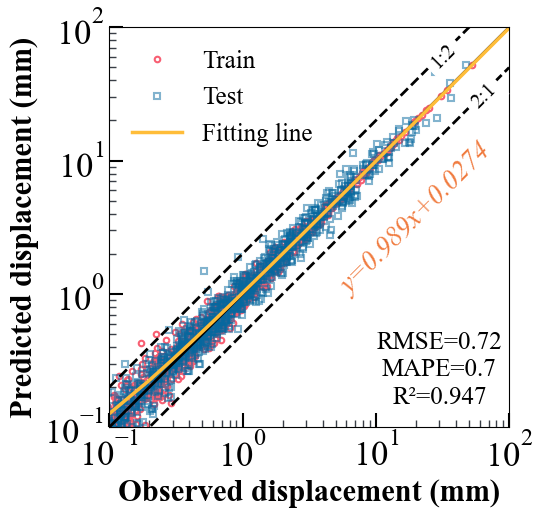

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
X_train,X_test,y_train,y_test=train_test_split(feature,target,random_state=5,test_size=0.2)
gbrt=GradientBoostingRegressor(max_depth=5,n_estimators=300)
gbrt.fit(X_train,y_train)
Test_predicted=gbrt.predict(X_test)
y_test=np.array([y_test])
Test_predicted=np.array([Test_predicted])

x=np.arange(0.1,100,0.1).reshape(-1,1)
y=x

X_train=X_train.iloc[:1500,:]
Train_predicted=gbrt.predict(X_train)
y_train=y_train.iloc[:1500]

y_train=np.array([y_train])
Test_predicted=Test_predicted.flatten()
y_test=y_test.flatten()
y_train=y_train.flatten()

Test=np.hstack([y_train,y_test[:1500]])
Predict=np.hstack([Train_predicted,Test_predicted[:1500]])

model = LinearRegression() # 构建线性模型
model.fit(y_test.reshape(-1,1), Test_predicted.reshape(-1,1)) # 自变量在前，因变量在后
# model.fit(Test.reshape(-1,1), Predict.reshape(-1,1)) # 自变量在前，因变量在后
predicts = model.predict(x) # 预测值

coef = model.coef_ # 斜率
intercept = model.intercept_ # 截距

R2 = metrics.r2_score(Test_predicted,y_test)
MSE = metrics.mean_squared_error(Test_predicted,y_test)
RMSE = metrics.mean_squared_error(Test_predicted,y_test)**0.5
MAE = metrics.mean_absolute_error(Test_predicted,y_test)
MAPE = metrics.mean_absolute_percentage_error(Test_predicted,y_test)
# R2 =cross_val_score(model,x, predicts,cv=10,scoring="r2").mean()
print('R2 = %.5f' % R2) # 输出 R2
print('MSE = %.5f' % MSE) # 输出 MSE
print('RMSE = %.5f' % RMSE) # 输出 RMSE
print('MAE = %.5f' % MAE) # 输出 MAE
print('MAPE = %.5f' % MAPE) # 输出 MAPE

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=100)
fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
font_Times_New_Roman={"family":"Times New Roman",
                    "weight":"heavy",
                    "size":22}
font_label={"family":"Times New Roman",
                    "size":18}

#坐标轴字体
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
ax.loglog(y_train, Train_predicted,linestyle='',marker='o',markersize=4,markerfacecolor='none',markeredgecolor='#f85f73',markeredgewidth=1.5,label='Train')
ax.loglog(y_test[:1500], Test_predicted[:1500],linestyle='',marker='s',markersize=4,markerfacecolor='none',markeredgecolor='#07689f',markeredgewidth=1.5,label='Test',alpha=0.5)

ax.plot(x, y,color='k',linestyle='-',linewidth=2)
ax.plot(x, 2*x,color='k',linestyle='--',linewidth=2)
ax.plot(x, 0.5*x,color='k',linestyle='--',linewidth=2)
ax.plot(x,coef*x+intercept,color='#ffbd39',label='Fitting line',linewidth=2.5)

ax.set_xlabel("Observed displacement (mm)",fontproperties=font_Times_New_Roman)                        
ax.set_ylabel("Predicted displacement (mm)",fontproperties=font_Times_New_Roman)
ax.tick_params(axis='x',which='major',direction='in',labelsize=25,length=10,width=1.5)    #主刻度x：朝向、长短、大小
ax.tick_params(axis='x',which='minor',direction='in',color='#393e46',labelsize=14,length=5,width=1)    #副刻度x
ax.tick_params(axis='y',which='major',direction='in',labelsize=25,length=10,width=1.5)     #主刻度x
ax.tick_params(axis='y',which='minor',direction='in',color='#393e46',labelsize=14,length=5,width=1)    #副刻度y
ax.set_xlim([0.1,100])
ax.set_ylim([0.1,100])
plt.text(30,0.15,
        'RMSE={:.3g}\nMAPE={:.3g}\nR²={:.3g}'.format(float(0.72),float(0.70),float(0.947)),
        fontsize=18,ha='center')

plt.text(32,50,'1:2',fontsize=15,ha='center',rotation=45,backgroundcolor='white')
plt.text(65,25,'2:1',fontsize=15,ha='center',rotation=45,backgroundcolor='white')
print(coef,intercept)
plt.text(20,1,'y={:.3g}x+{:.3g}'.format(float(coef),float(intercept)),fontsize=20,ha='center',rotation=45,style = "italic",color='#f07b3f')

plt.legend(frameon=False,prop=font_label)
plt.savefig('E:\\PyCharm\\PythonProject\\Transformer_response predict\\cowtransfer\\GBRT.png', bbox_inches='tight')